     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587
5  1960-06  13791
6  1960-07   9498
7  1960-08   8251
8  1960-09   7049
9  1960-10   9545


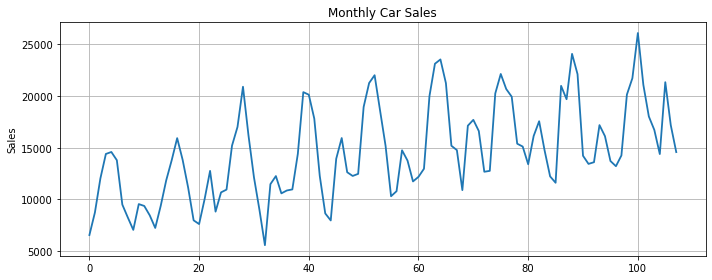

ADF Statistic: -1.2238127661752842
p-value: 0.6632691049832867
The data is not stationary.


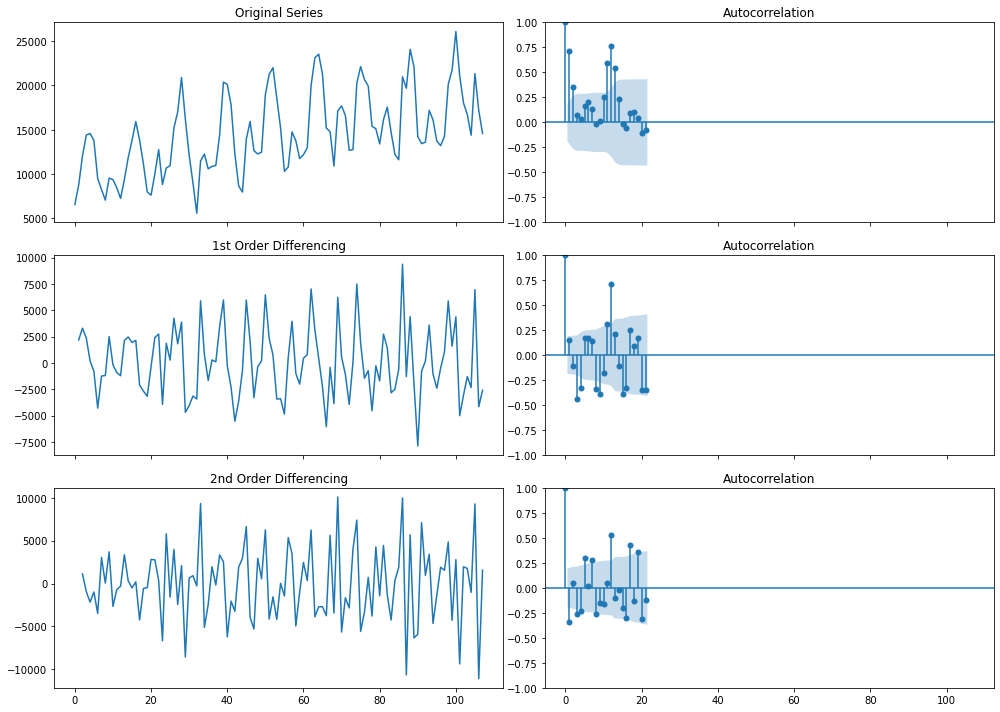

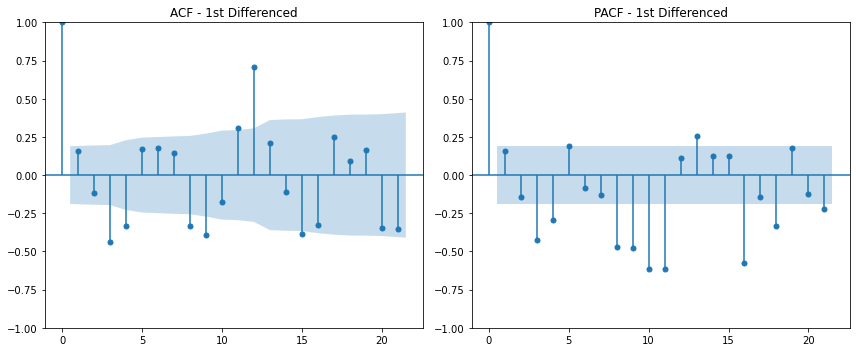

                                    SARIMAX Results                                     
Dep. Variable:                            Sales   No. Observations:                   96
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -729.677
Date:                          Sun, 02 Nov 2025   AIC                           1469.354
Time:                                  22:59:49   BIC                           1481.448
Sample:                                       0   HQIC                          1474.213
                                           - 96                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2276      0.142      1.606      0.108      -0.050       0.505
ma.L1         -0.8652      0.083    -10.432      0.

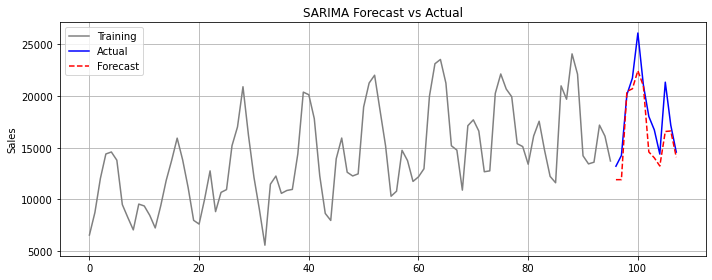

RMSE: 2333.74
R²: 0.61


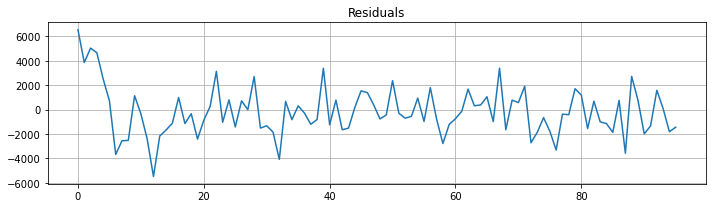

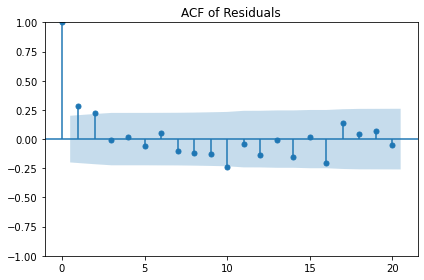

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("06-RollingRegCarSales.csv")
print(df.head(10))


plt.figure(figsize=(10,4))
plt.plot(df.index, df["Sales"], lw=1.8)
plt.title("Monthly Car Sales")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


result = adfuller(df["Sales"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("The data is not stationary.")
else:
    print("The data is stationary.")


fig, ax = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
ax[0, 0].plot(df["Sales"]); ax[0, 0].set_title('Original Series')
plot_acf(df["Sales"], ax=ax[0, 1])

ax[1, 0].plot(df["Sales"].diff()); ax[1, 0].set_title('1st Order Differencing')
plot_acf(df["Sales"].diff().dropna(), ax=ax[1, 1])

ax[2, 0].plot(df["Sales"].diff().diff()); ax[2, 0].set_title('2nd Order Differencing')
plot_acf(df["Sales"].diff().diff().dropna(), ax=ax[2, 1])
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(df["Sales"].diff().dropna(), ax=plt.gca())
plt.title("ACF - 1st Differenced")

plt.subplot(1, 2, 2)
plot_pacf(df["Sales"].diff().dropna(), ax=plt.gca())
plt.title("PACF - 1st Differenced")
plt.tight_layout()
plt.show()


split_idx = -12
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]


model = ARIMA(train["Sales"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.summary())


forecast = model_fit.forecast(steps=12)
forecast.index = test.index


plt.figure(figsize=(10,4))
plt.plot(train["Sales"], label="Training", color="gray")
plt.plot(test["Sales"], label="Actual", color="blue")
plt.plot(forecast, label="Forecast", color="red", linestyle="--")
plt.title("SARIMA Forecast vs Actual")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


rmse = np.sqrt(mean_squared_error(test["Sales"], forecast))
r2 = r2_score(test["Sales"], forecast)
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 2))


residuals = model_fit.resid
plt.figure(figsize=(10,3))
plt.plot(residuals)
plt.title("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

plot_acf(residuals.dropna())
plt.title("ACF of Residuals")
plt.tight_layout()
plt.show()
